In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
phising_data=pd.read_csv('/kaggle/input/phishing-dataset-for-machine-learning/Phishing_Legitimate_full.csv')
phising_data.head(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [35]:
phising_data.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [36]:
print(list(phising_data.columns))

['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT', 'CLASS_LABEL']


In [37]:
for col in phising_data.columns:
    unique_val=phising_data[col].unique()
    if len(unique_val)>10:
        ...
#         print(f'the {col} column has {phising_data[col].nunique()}')
    else:
        print(f'the {col} column has {phising_data[col].nunique()}')

the NumDashInHostname column has 10
the AtSymbol column has 2
the TildeSymbol column has 2
the NumHash column has 2
the NoHttps column has 2
the RandomString column has 2
the IpAddress column has 2
the DomainInSubdomains column has 2
the DomainInPaths column has 2
the HttpsInHostname column has 1
the DoubleSlashInPath column has 2
the NumSensitiveWords column has 4
the EmbeddedBrandName column has 2
the ExtFavicon column has 2
the InsecureForms column has 2
the RelativeFormAction column has 2
the ExtFormAction column has 2
the AbnormalFormAction column has 2
the FrequentDomainNameMismatch column has 2
the FakeLinkInStatusBar column has 2
the RightClickDisabled column has 2
the PopUpWindow column has 2
the SubmitInfoToEmail column has 2
the IframeOrFrame column has 2
the MissingTitle column has 2
the ImagesOnlyInForm column has 2
the SubdomainLevelRT column has 3
the UrlLengthRT column has 3
the PctExtResourceUrlsRT column has 3
the AbnormalExtFormActionR column has 3
the ExtMetaScriptL

In [38]:
if 'id' in phising_data.columns: 
    phising_data=phising_data.drop(columns='id')
phising_data.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


Text(0.5, 1.0, 'phising vs non-phising website url')

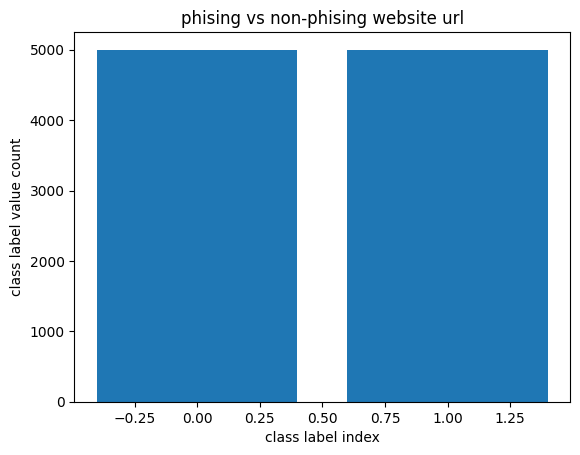

In [39]:
classlablect=phising_data['CLASS_LABEL'].value_counts()

# here we just creating the plot

plt.bar(classlablect.index,classlablect.values)

plt.xlabel('class label index')
plt.ylabel('class label value count')
plt.title('phising vs non-phising website url')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [41]:
target=phising_data['CLASS_LABEL']
features=phising_data.drop(
    ['CLASS_LABEL', 'RelativeFormAction', 'DoubleSlashInPath', 
     'HttpsInHostname', 'DomainInSubdomains', 'FakeLinkInStatusBar', 
     'RandomString', 'EmbeddedBrandName', 'AtSymbol', 'ImagesOnlyInForm', 
     'NumHash', 'AbnormalFormAction', 'UrlLengthRT', 
     'PctExtResourceUrlsRT', 'PopUpWindow', 'RightClickDisabled', 'IpAddress', 
     'SubdomainLevelRT', 'TildeSymbol'], axis=1
)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [43]:
lg_model=LogisticRegression()
sv_model=SVC()
dtc_model=DecisionTreeClassifier()
k_model=KNeighborsClassifier()

# fit created models
lg_model.fit(X_train,y_train)
sv_model.fit(X_train,y_train)
dtc_model.fit(X_train,y_train)
k_model.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [44]:
lg_pred=lg_model.predict(X_test)
sv_pred=sv_model.predict(X_test)
dt_pred=dtc_model.predict(X_test)
k_pred=k_model.predict(X_test)

lg_accuracy=accuracy_score(y_test,lg_pred)
sv_accuracy=accuracy_score(y_test,sv_pred)
dt_accuracy=accuracy_score(y_test,dt_pred)
k_accuracy=accuracy_score(y_test,k_pred)

In [45]:
print('logistic regression accuracy :', lg_accuracy)
print('Support vector accuracy:',sv_accuracy)
print('decision accuracy:',dt_accuracy)
print('knn accuracy:',k_accuracy)

logistic regression accuracy : 0.928
Support vector accuracy: 0.8575
decision accuracy: 0.9715
knn accuracy: 0.8735


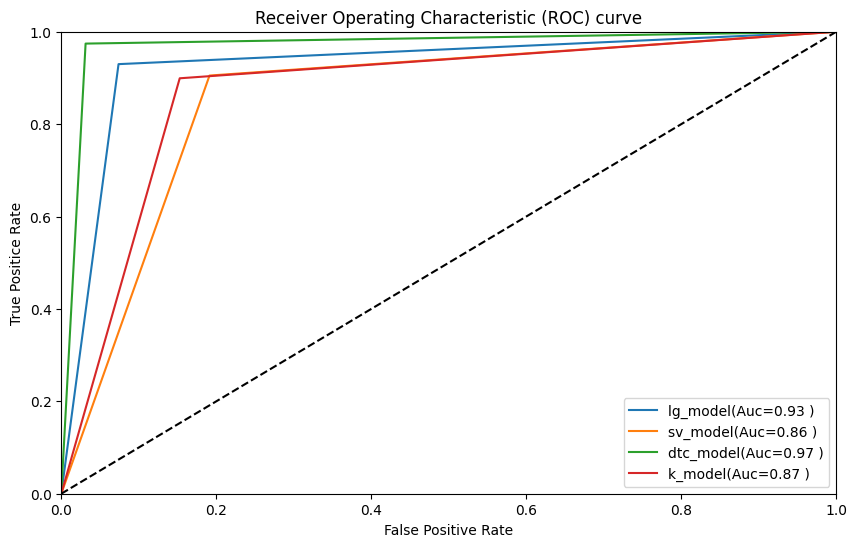

In [46]:
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
models=['lg_model','sv_model','dtc_model','k_model']
predictions=[lg_pred,sv_pred,dt_pred,k_pred]

plt.figure(figsize=(10,6))
for model,prediction in zip(models,predictions):
    fpr,tpr,_=roc_curve(y_test,prediction)
    auc_score=roc_auc_score(y_test,prediction)
    plt.plot(fpr,tpr,label=model+'(Auc={:.2f} )'.format(auc_score))
plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positice Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

In [47]:
for model,prediction in zip(models,predictions):
    con_matrix=confusion_matrix(y_test,prediction)
    
    tn,fp,fn,tp=con_matrix.ravel()
    
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    
    precision=tp/(tp+fp)
    
    recall=tp/(tp+fn)
    
    f1_score=2 * precision *recall/ (precision+recall)
    
    print ('Model',model)
    print('Confusion Matrix')
    print(con_matrix)
    
    print('Accuracy',accuracy)
    print('recall',recall)
    print('precision',precision)
    print('f1 score',f1_score)
    print('___________')

Model lg_model
Confusion Matrix
[[915  73]
 [ 71 941]]
Accuracy 0.928
recall 0.9298418972332015
precision 0.928007889546351
f1 score 0.9289239881539981
___________
Model sv_model
Confusion Matrix
[[799 189]
 [ 96 916]]
Accuracy 0.8575
recall 0.9051383399209486
precision 0.8289592760180996
f1 score 0.865375531412376
___________
Model dtc_model
Confusion Matrix
[[957  31]
 [ 26 986]]
Accuracy 0.9715
recall 0.974308300395257
precision 0.9695181907571289
f1 score 0.9719073435189749
___________
Model k_model
Confusion Matrix
[[837 151]
 [102 910]]
Accuracy 0.8735
recall 0.8992094861660079
precision 0.8576814326107446
f1 score 0.8779546550892426
___________
